In [66]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [67]:
set_nb_theme('onedork')

# Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt

In [69]:
df_train = pd.read_excel("C:/Users/larry/Downloads/Compressed/Data/05 Input Data/Prediction of Placement Status Data/01 Train Data.xlsx")

In [70]:
df_test_m = pd.read_excel("C:/Users/larry/Downloads/Compressed/Data/05 Input Data/Prediction of Placement Status Data/02 Test Data.xlsx")

The Dependent Variables which affects the Placement is CGPA, Speaking Skills, ML Knowledge

In [71]:
df_train = df_train[['CGPA','Speaking Skills','ML Knowledge','Placement Status']]

In [72]:
df_test_c = df_test_m[['CGPA','Speaking Skills','ML Knowledge']]

Dropping the Null values 

C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: >

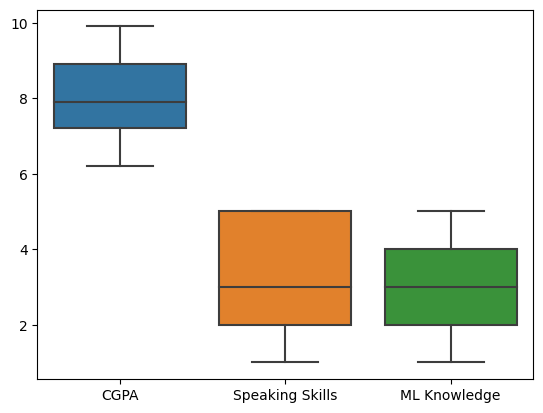

In [73]:
sns.boxplot(data = df_train)

C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

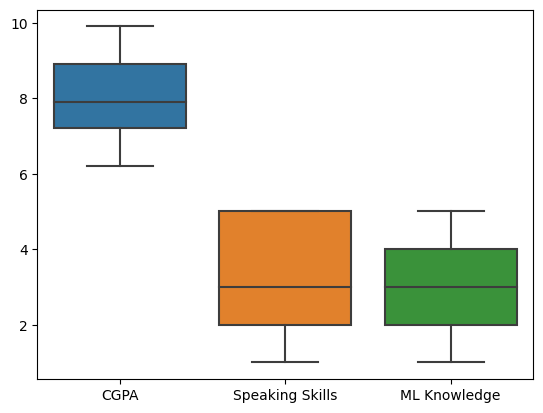

In [74]:
sns.boxplot(data = df_test_c)

Dropping Null Values

In [75]:
df_train = df_train.dropna(axis=0)

Replacing the Placement Status with 0 and 1 to train the model

In [76]:
df_train.loc[df_train["Placement Status"] == "Not placed","Placement Status"] = 0
df_train.loc[df_train["Placement Status"] == "Placed","Placement Status"] = 1

In [77]:
x = df_train[['CGPA','Speaking Skills','ML Knowledge']]
y = df_train['Placement Status'].astype('int')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Using 3 Different Algorithms to Test the Model Efficiency

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2,min_samples_leaf=3)
import xgboost as xgb
xg_model = xgb.XGBClassifier()
from sklearn.linear_model import LogisticRegression
Log_model = LogisticRegression()

In [81]:
model.fit(x_train, y_train)
xg_model.fit(x_train, y_train)
Log_model.fit(x_train, y_train)

C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

LogisticRegression()

In [82]:
y_pred = xg_model.predict(x_test)
y_pred_2 = model.predict(x_test)
y_pred_3 = Log_model.predict(x_test)

C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

In [83]:
predictions = [round(value) for value in y_pred]
predictions_2 = [round(value) for value in y_pred_2]
predictions_3 = [round(value) for value in y_pred_3]

In [84]:
# Model XGboost and Logistic Regression gave the same results.

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy_2 = accuracy_score(y_test, predictions_2)
print("Accuracy: %.2f%%" % (accuracy_2 * 100.0))
accuracy_3 = accuracy_score(y_test, predictions_3)
print("Accuracy: %.2f%%" % (accuracy_3 * 100.0))

Accuracy: 56.75%
Accuracy: 64.46%
Accuracy: 64.46%


In [85]:
base_pred = xg_model.predict(df_test_c)

C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\larry\anaconda3\envs\Python\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

In [86]:
base_pred = pd.Series(base_pred)

In [87]:
df_new = pd.concat([df_test_m, base_pred], axis=1)

In [88]:
df_new = df_new.drop(["Placement Status"],axis=1)

In [89]:
df_new.rename(columns={0: "Placement Status"}, inplace=True)

In [90]:
df_new.loc[df_new["Placement Status"] == 0,"Placement Status"] = "Not placed"
df_new.loc[df_new["Placement Status"] == 1,"Placement Status"] = "Placed"

C:\Users\larry\AppData\Local\Temp\ipykernel_1176\1183103477.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not placed' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_new.loc[df_new["Placement Status"] == 0,"Placement Status"] = "Not placed"


Final Output

In [91]:
df_new

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,Not placed
1,Amrita,amrita@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",Whatsapp,NaN,Students,NaN,9.1,3,3,Placed
2,Mamta,mamta@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,Whatsapp,NaN,Students,NaN,6.9,2,2,Placed
3,Bhagyashri,bhagyashri@xyz.com,1,NaN,Hello ML and DL,2.293946e+09,NaN,Free Order,USD,0,...,Attending,wilson college,Others,NaN,Students,NaN,8.4,4,4,Not placed
4,Divyanshu,divyanshu@xyz.com,1,NaN,Hello ML and DL,2.293956e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",Whatsapp,NaN,Students,NaN,6.7,5,5,Not placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,Saif ali,saifali@xyz.com,1,NaN,Data Visualization using Power BI,1.949319e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2021,9.0,3,2,Not placed
3792,Lankesh,lankesh@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,NaN,NaN,Students,2021,7.2,4,3,Not placed
3793,Sanjay,sanjay@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,wilson college,NaN,NaN,Students,2021,8.5,2,3,Not placed
3794,Sushmita,sushmita@xyz.com,1,NaN,Data Visualization using Power BI,1.949330e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",NaN,NaN,Students,2021,6.5,5,5,Not placed


In [92]:
df_new.to_csv('final Upload.csv')